# Segundo metodo

$$
y_{n+1} = y_n + hf + \frac{h^2}{2} \left(\frac{\partial f}{\partial x} + \frac{\partial f}{\partial y} f \right)
$$

donde $f$ y sus parciales estan evaluadas en $f(x_n,y_n)$

In [8]:
from pylab import *
%matplotlib inline

In [45]:
#24/08/16
#Ecuacion diferencial, punto inicial, tiempo, jacobiano de la ecuacion y  h)
#Me conviene que me de la regla y sus derivadas parciales. 
def segundo_orden1(ec_diff, p_ini, t_final, ec_jac, h=0.1):
    tiempo  = arange(0, t_final+h, h)
    y = zeros(len(tiempo))
    y[0] = p_ini
    for i in range (len(tiempo)-1):
        y[i+1] = y[i] + h*ec_diff((y[i]),tiempo[i])
        y[i+1] += 0.5*h*h*ec_jac(y[i],tiempo[i])[0]
        y[i+1] += 0.5*h*h*ec_jac(y[i],tiempo[i])[1]*ec_diff(y[i],tiempo[i])
    return tiempo, y

In [28]:
arange(0,3,0.25)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75])

In [37]:
#El tiempo tiene que estar escalado con h
def euler1(ec_diff, p_ini, t_final, h=0.1):
    tiempo  = arange(0, t_final+h, h)
    y = zeros(len(tiempo))
    y[0] = p_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + h*ec_diff(y[i],tiempo[i])
    return tiempo, y

In [10]:
def ec_dif(y,x):
    return x*sin(y)

def d_ec_dif(y,x):
    return sin(y),x*cos(y)

In [15]:
d_ec_dif(pi/4,2)

(0.70710678118654746, 1.4142135623730951)

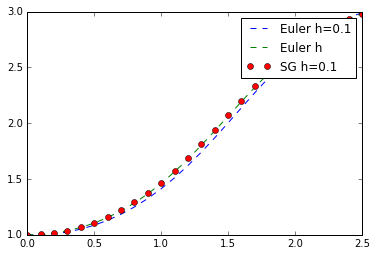

In [54]:
y_euler = euler1(ec_dif, 1, 2.5)
y_euler_01 = euler1(ec_dif, 1, 2.5, 0.01) #9
y_seg = segundo_orden1(ec_dif,1,2.5,d_ec_dif)
plot(y_euler[0], y_euler[1], '--', label="Euler h=0.1")
plot(y_euler_01[0], y_euler_01[1], '--', label="Euler h")
plot(y_seg[0],y_seg[1], 'o', label="SG h=0.1")
legend()
show()

In [ ]:
print y_seg[1][-1-y_euler[1][-1]
print y_